In [28]:
import torch as th
import torch.optim as optim
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def plot_loss_curve(loss_curve):
        plt.plot(list(range(len(loss_curve))), loss_curve)
        plt.show()

In [30]:
class LeastSquaresContainer(nn.Module):
    def __init__(self, n):
        super().__init__()
        x = th.tensor(np.random.random(n), dtype=th.float32)
        self.x = nn.Parameter(x)
    
    def loss(self, E, d):
        return loss_function(E, self.x, d)

In [31]:
def loss_function(E, x, d):
    return (th.norm(E@x -d))**2
    
def least_squares_approx(E, d, lr=0.00001, epochs=500):
    m, n = E.shape
    estimator = LeastSquaresContainer(n)
    loss_curve= []
    optimizer = optim.SGD(estimator.parameters(), lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss=estimator.loss(E,d)
        loss.backward()
        loss_curve.append(loss.item())
        optimizer.step()
    plot_loss_curve(loss_curve)
    return estimator

In [32]:
E = np.load("E.npy")
d = np.load("d.npy")
E = th.tensor(E, dtype=th.float32)
d = th.tensor(d, dtype=th.float64) 

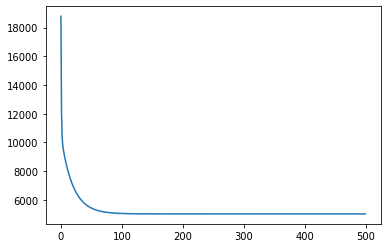

In [33]:
estimator = least_squares_approx(E, d)

In [34]:
print("Link Delay: " , estimator.x)

Link Delay:  Parameter containing:
tensor([ 0.0796,  0.7039,  0.4649,  0.2745,  0.7181,  0.9140,  0.9118, -0.0311,
         0.3249,  0.6081,  0.8268,  0.9387,  0.8505,  0.7036,  0.1246,  0.4544,
         0.8188,  0.1274,  0.2431,  0.6971], requires_grad=True)
